In [39]:
# Impport Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sk
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Ignore warning messages
warnings.filterwarnings('ignore')

sns.set()

In [40]:
# Load the dataset
df = pd.read_csv('job_description.csv')

df.head()

,Unnamed: 0,Category,Description,Benefits,Requirement,Requirements
0,0,Business Analyst,Description\nJob Title: Junior Business Analys...,Benefits\nMethods is passionate about its peop...,Requirements\n• Confidence in communicating an...,NaN
1,1,Business Analyst,Description\nThe Business Analyst (BA) will ca...,Benefits\nA competitive base salary\nBonus sch...,Requirements\nYou have…\nA methodical approach...,NaN
2,2,Business Analyst,Description\nWe help our clients design and de...,Benefits\nWe have 2 promotion windows open eac...,"Requirements\nYou are open, curious, and excit...",NaN
3,3,Business Analyst,Description\nFounded in 2015 and rapidly expan...,Benefits\nIn addition to a competitive package...,Requirements\nKey Responsibilities Include:\nP...,NaN
4,4,Business Analyst,Description\nWe are seeking a skilled Business...,Benefits\nFood Allowance\nGovernment Benefits\...,Requirements\nBachelor's Degree in management ...,NaN


In [41]:
# Remove NA rows
df.dropna(axis=0)

,Unnamed: 0,Category,Description,Benefits,Requirement,Requirements


In [42]:
df.describe(include='all')

,Unnamed: 0,Category,Description,Benefits,Requirement,Requirements
count,325.000000,325,316,272,54,261
unique,NaN,6,191,159,27,168
top,NaN,Data Scientist,"Description\nAbout Us\nLove, Bonito is a digit...",Benefits\nReady to join a company where hard w...,Requirements\nBachelor's degree\nMinimum of 3 ...,Requirements\nMandatory Requirements\n3+ years...
freq,NaN,103,6,6,4,6
mean,162.000000,NaN,NaN,NaN,NaN,NaN
std,93.963645,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,81.000000,NaN,NaN,NaN,NaN,NaN
50%,162.000000,NaN,NaN,NaN,NaN,NaN
75%,243.000000,NaN,NaN,NaN,NaN,NaN


In [43]:
# Drop the columns that are not relevant

df.drop(df.iloc[:,:1],axis=1, inplace=True)

df.head()

,Category,Description,Benefits,Requirement,Requirements
0,Business Analyst,Description\nJob Title: Junior Business Analys...,Benefits\nMethods is passionate about its peop...,Requirements\n• Confidence in communicating an...,NaN
1,Business Analyst,Description\nThe Business Analyst (BA) will ca...,Benefits\nA competitive base salary\nBonus sch...,Requirements\nYou have…\nA methodical approach...,NaN
2,Business Analyst,Description\nWe help our clients design and de...,Benefits\nWe have 2 promotion windows open eac...,"Requirements\nYou are open, curious, and excit...",NaN
3,Business Analyst,Description\nFounded in 2015 and rapidly expan...,Benefits\nIn addition to a competitive package...,Requirements\nKey Responsibilities Include:\nP...,NaN
4,Business Analyst,Description\nWe are seeking a skilled Business...,Benefits\nFood Allowance\nGovernment Benefits\...,Requirements\nBachelor's Degree in management ...,NaN


In [44]:
# Combine the 'Description' and 'Requirements' columns for a fuller text feature
df['text'] = df['Description'] + ' ' + df['Requirement'].fillna('')

# Basic text cleaning
df['text'] = df['text'].str.replace(r'\n', ' ').str.replace(r'\r', ' ')

df.head()

,Category,Description,Benefits,Requirement,Requirements,text
0,Business Analyst,Description\nJob Title: Junior Business Analys...,Benefits\nMethods is passionate about its peop...,Requirements\n• Confidence in communicating an...,NaN,Description Job Title: Junior Business Analyst...
1,Business Analyst,Description\nThe Business Analyst (BA) will ca...,Benefits\nA competitive base salary\nBonus sch...,Requirements\nYou have…\nA methodical approach...,NaN,Description The Business Analyst (BA) will cap...
2,Business Analyst,Description\nWe help our clients design and de...,Benefits\nWe have 2 promotion windows open eac...,"Requirements\nYou are open, curious, and excit...",NaN,Description We help our clients design and del...
3,Business Analyst,Description\nFounded in 2015 and rapidly expan...,Benefits\nIn addition to a competitive package...,Requirements\nKey Responsibilities Include:\nP...,NaN,Description Founded in 2015 and rapidly expand...
4,Business Analyst,Description\nWe are seeking a skilled Business...,Benefits\nFood Allowance\nGovernment Benefits\...,Requirements\nBachelor's Degree in management ...,NaN,Description We are seeking a skilled Business ...


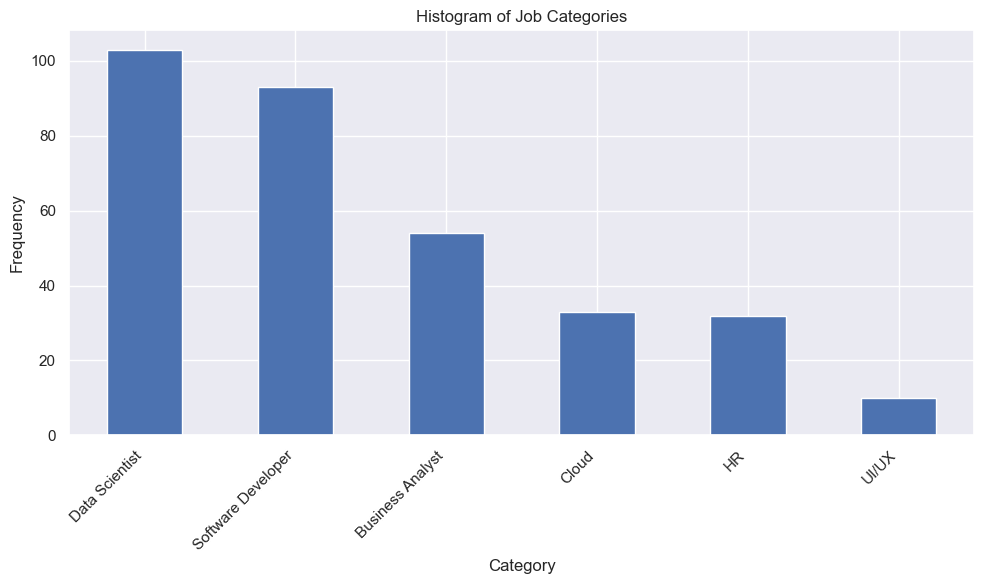

In [45]:
# Plotting the histogram for the 'Category' column
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Histogram of Job Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [46]:
import nltk
nltk.download('stopwords')
from collections import Counter
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def remove_stop_words(text):
    # Convert non-string inputs to an empty string
    if not isinstance(text, str):
        return ''
    
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to your text data, ensuring all inputs are strings
df['filtered_text'] = df['text'].apply(remove_stop_words)

df.head()


,Category,Description,Benefits,Requirement,Requirements,text,filtered_text
0,Business Analyst,Description\nJob Title: Junior Business Analys...,Benefits\nMethods is passionate about its peop...,Requirements\n• Confidence in communicating an...,NaN,Description Job Title: Junior Business Analyst...,Description Job Title: Junior Business Analyst...
1,Business Analyst,Description\nThe Business Analyst (BA) will ca...,Benefits\nA competitive base salary\nBonus sch...,Requirements\nYou have…\nA methodical approach...,NaN,Description The Business Analyst (BA) will cap...,Description Business Analyst (BA) capture clie...
2,Business Analyst,Description\nWe help our clients design and de...,Benefits\nWe have 2 promotion windows open eac...,"Requirements\nYou are open, curious, and excit...",NaN,Description We help our clients design and del...,Description help clients design deliver digita...
3,Business Analyst,Description\nFounded in 2015 and rapidly expan...,Benefits\nIn addition to a competitive package...,Requirements\nKey Responsibilities Include:\nP...,NaN,Description Founded in 2015 and rapidly expand...,"Description Founded 2015 rapidly expanding, Fr..."
4,Business Analyst,Description\nWe are seeking a skilled Business...,Benefits\nFood Allowance\nGovernment Benefits\...,Requirements\nBachelor's Degree in management ...,NaN,Description We are seeking a skilled Business ...,Description seeking skilled Business Analyst j...


In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Category'], test_size=0.2, random_state=1)


In [49]:
# Fill NaN values in the text column with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

In [50]:

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [51]:
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [52]:
# Predict the categories of the test data
y_pred = model.predict(X_test_tfidf)

# Print a classification report
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

  Business Analyst       0.86      0.75      0.80         8
             Cloud       1.00      0.17      0.29         6
    Data Scientist       0.74      1.00      0.85        25
                HR       0.00      0.00      0.00         4
Software Developer       0.65      0.83      0.73        18
             UI/UX       0.00      0.00      0.00         4

          accuracy                           0.72        65
         macro avg       0.54      0.46      0.44        65
      weighted avg       0.66      0.72      0.65        65



In [53]:
# Create a pipeline
pipeline = make_pipeline(TfidfVectorizer(stop_words='english', max_features=10000), MultinomialNB())

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

  Business Analyst       0.86      0.75      0.80         8
             Cloud       1.00      0.17      0.29         6
    Data Scientist       0.74      1.00      0.85        25
                HR       0.00      0.00      0.00         4
Software Developer       0.65      0.83      0.73        18
             UI/UX       0.00      0.00      0.00         4

          accuracy                           0.72        65
         macro avg       0.54      0.46      0.44        65
      weighted avg       0.66      0.72      0.65        65



Business Analyst: With a precision of 0.86 and recall of 0.75, the model performs reasonably well in this category. It suggests that when the model predicts a job posting as 'Business Analyst,' it is correct 86% of the time, and it correctly identifies 75% of all 'Business Analyst' postings. To improve, consider more balanced data or more specific features that distinguish this category.

Cloud: While precision is perfect at 1.00, the recall is quite low at 0.17, indicating that while all predictions of 'Cloud' are correct, the model misses a lot of actual 'Cloud' postings. This could be due to imbalanced data or insufficient representative features for this category.

Data Scientist: This category shows strong performance, with a precision of 0.74 and recall of 1.00. The model identifies all 'Data Scientist' postings correctly, but there is a small margin where it incorrectly labels other postings as 'Data Scientist.' Fine-tuning or adding more nuanced features could help.

HR: The model fails to correctly identify any 'HR' postings (precision and recall are 0.00). This might be due to a very small number of 'HR' examples in your dataset, leading to underfitting. Consider augmenting your dataset with more 'HR' examples or applying techniques like SMOTE for data augmentation.

Software Developer: With a precision of 0.65 and recall of 0.83, the model has a decent grasp on this category, though there's room for improvement in precision. It could benefit from more detailed feature engineering or the inclusion of more context-specific training data.

UI/UX: Similar to 'HR,' the model cannot correctly classify any 'UI/UX' postings. This suggests a need for more training data in this category or a review of the features being used to train the model.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups  # Example dataset


In [55]:
# Define a pipeline combining a TfidfVectorizer with a MultinomialNB classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB()),
])


In [56]:
parameter_grid = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'clf__alpha': (1e-2, 1e-3, 1e-1, 1),  # Smoothing parameter
}


In [57]:
# Initialize the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, parameter_grid, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.01, 0.001, 0.1, 1),
                         'tfidf__max_df': (0.5, 0.75, 1.0),
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [58]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Best score: 0.796
Best parameters set:
	clf__alpha: 0.001
	tfidf__max_df: 0.75
	tfidf__ngram_range: (1, 2)


In [59]:
# Extracting best parameters for TfidfVectorizer and MultinomialNB
tfidf_best_params = {
    'stop_words': 'english',
    'max_df': best_parameters['tfidf__max_df'],
    'ngram_range': best_parameters['tfidf__ngram_range'],
}

nb_best_params = {
    'alpha': best_parameters['clf__alpha'],
}

# Building the pipeline with the best parameters
pipeline_best = Pipeline([
    ('tfidf', TfidfVectorizer(**tfidf_best_params)),
    ('clf', MultinomialNB(**nb_best_params)),
])

# Fit the pipeline on your training data
pipeline_best.fit(X_train, y_train)

# Now you can use pipeline_best for predictions or further evaluations
y_pred = pipeline_best.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

                    precision    recall  f1-score   support

  Business Analyst       0.88      0.88      0.88         8
             Cloud       0.62      0.83      0.71         6
    Data Scientist       0.83      0.96      0.89        25
                HR       1.00      0.50      0.67         4
Software Developer       0.94      0.83      0.88        18
             UI/UX       1.00      0.50      0.67         4

          accuracy                           0.85        65
         macro avg       0.88      0.75      0.78        65
      weighted avg       0.87      0.85      0.84        65



Precision: Indicates the proportion of positive identifications that were actually correct. For example, the model has a precision of 0.88 for 'Business Analyst', meaning that 88% of the instances it predicted as 'Business Analyst' were correct.
Recall: Shows the proportion of actual positives that were identified correctly. For 'Business Analyst', the recall is also 0.88, indicating that the model correctly identified 88% of all actual 'Business Analyst' instances.
F1-Score: A weighted average of precision and recall. It reaches its best value at 1 (perfect precision and recall) and worst at 0. 'Business Analyst' has an F1-score of 0.88, showing a good balance between precision and recall.
Support: The number of actual occurrences of each class in the specified dataset. For example, there were 8 instances of 'Business Analyst'.


Analysis:
High Performance: The model performs particularly well for 'Data Scientist' and 'Software Developer' categories, with high precision, recall, and F1-scores.
Room for Improvement: The 'Cloud' and 'UI/UX' categories have lower recall and F1-scores compared to other categories, suggesting that the model might be missing some true positives or incorrectly classifying instances from these categories.
Overall: The model has an overall accuracy of 85%, which is quite good. The macro average F1-score is 0.78, indicating that the model is generally performing well across all categories, but there might be some categories where it could improve.